#### Name: Ben Maxwell

# PHYS 230 Lab Assignment 5

### Wednesday, February 4, 2026: Chapter 3.3-3.4
- Density plots
- 2D graphics

I just want it to be noted that I wasn't as thorough as usual due to the fact that I was repeating this assignment and I was attempting to save time this weekend. 

#### Start by importing any packages you need below (feel free to update as you go):

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qdraw import window, circle, show, draw, rectangle


## Catch the errors! (15 pts - 5 pts each)

For each of the following cells, find the error (or errors), and correct it (or them) by:<br> 
    a. add a new markdown cell that describes what was wrong with the code,<br>
    b. creating a new code cell with the corrected code (where possible)<br>
<br>
**Make sure to write in complete sentences; corrected code with a poorly written explanation will not receive better than 4 of 5 points on a given question.** I am not looking for a lengthy explanation; but one that is sufficiently detailed to explain the errors. 

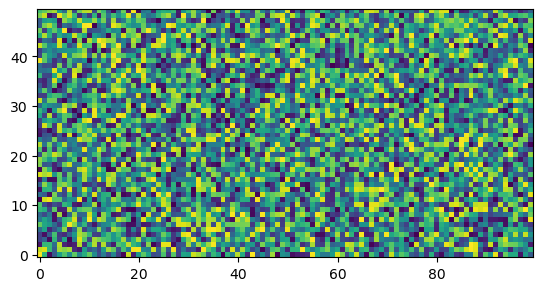

In [6]:
#1 - create a 50 x 100 array of random numbers between 0 and 1 and make a density plot with the origin at the lower left corner
myarray = np.random.rand(50,100)
plt.imshow(myarray, origin='lower')

The first thing I notice is that my array has a space in it when it shouldn't have an space. The second thing I notice is that lower is not in quatations so I fix that. 

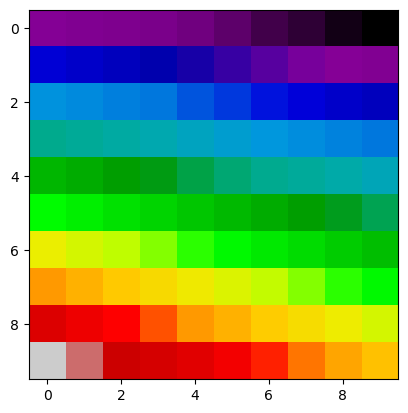

In [9]:
#2 - create a 2D array out of x and y and plot a density plot out of it 
x = np.linspace(1,10)
y = np.linspace(10,1)
height= np.zeros((10,10))
for i in range(10):
    for j in range(10):
        height[i,j] = x[i]*y[j]
plt.imshow(height)

I changed height and redefined it as a 2D array with 10 zeroes. I then went through all values of x and y and multiplied them, and then added then to height in theier places respectively. 

In [5]:
#3 - make a 2D graphic of a circle centered on a,b = 0,0
window(xlim=[-10,10],ylim=[-10,10])

a = 0 
b = 0
circle(pos=(a,b), size=1)

The first thing I notice is that a and b are not defined, so I define them. The next thing is that there is not a window for the object to appear on, so I create a window. 

## Short python snippets (10 pts - 5 pts each)
Below each markdow cell, write a short python snippet to perform the indicated action; you will likely have to use google to find out how to perform some of these actions--this is deliberate on my part. Google and *stack overflow* are your friends.<br>
Add a markdown cell to explain your thinking if this is needed.

1. Create a 2D array of random numbers (of your choice) and plot them as a density plot with the origin in the lower left corner. Change the color scheme to some sort of rainbow. 

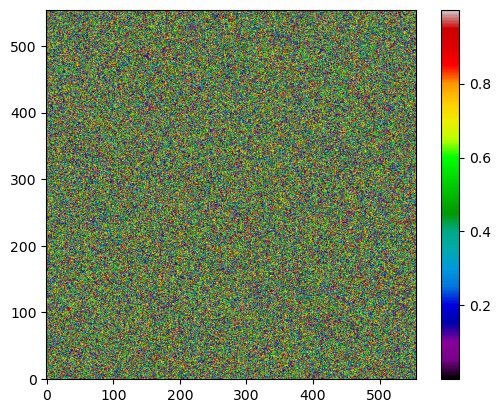

In [11]:
#Making a random 2D array
aa = np.random.rand(555,555)
#Plotting the array with the origin in the lower left corner. 
plt.imshow(aa, origin='lower')
#Rainbow!
plt.nipy_spectral()
plt.colorbar()

The first thing I do is make a random 2D array with 555 in each part. Then I plotted them with the imshow function, and set the origin to the lower left. Then I changed the graph to be rainbow with nipy spectral, and added a color bar for fun. 

2. In a window with a background color of your choice (not white), create a rectangle at the center with 2 circles in different locations around the window. Make the circles your favorite colors (of those available). 

In [1]:
from qdraw import window, circle, show, draw, rectangle
#Making a window with a green backgroun
window(xlim=[-10,10],ylim=[-10,10],bgcolor="green")
#Making A Rectangle
rectangle(left=-4, right=4, bottom=-6,top=6,pos=(0,0),color="red")
#Draws 2 circle
circle(pos=(2,2), size=1, color="magenta")
circle(pos=(-2,-2), size=1, color="blue")
#Show
show()


To begin my code, I start by using the window function to make a green background. Afterwards, I made a rectange using the rectangle function, putting it in the center using pos and making it red using color. Then I drew two circles, one at 2,2 and the other at -2, -2, one of which was blue and the other of which was purple. 

### Write a script 1 
#### Making a density plot of a function

Write a code to do the following: 
- Create a 2D array that shows how the values change linearly from the center outwards based on the equation: 
$$ B = 7.5r - 2.8 $$
    - the overall grid should be 200 x 200 units 
    - you should use a 1000x1000 array
- Plot the array as a density plot, change the color scale to one of your choice, and include a color bar

When your program is complete, add a markdown cell below it to explain your process and program. 

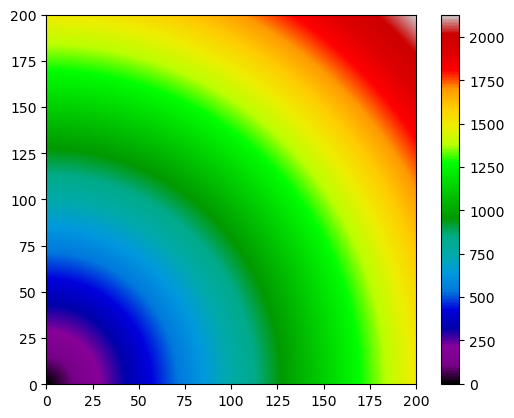

In [7]:
# Making arrays for x and y
x = np.linspace(0,201,1000)
y = np.linspace(0,201,1000)
# Making B and empty array with 1000 values and 2D
B = np.zeros((1000,1000))
# Calculating r using x and y, and then adding it to B
for i in range(1000):
    for j in range(1000):
        r = np.sqrt((x[i]**2)+(y[j]**2))
        B[i, j] =7.5*r-2.8
#Plotting B
plt.imshow(B,extent=[0,200,0,200],origin='lower')
#Changing the color and adding color bar
plt.nipy_spectral()
plt.colorbar()
plt.show()

To start my code, I defined x and y using linspace, and made sure there were 1000 values in each. Then I created B to be a 2d array with 1000 zeros each each column. The, I go through every value of X and y and calculate r, and then I calculate each value of B using the given equation. Then I used imshow to plot B, and made the extent only 200 units. I made the origin in the bottom left, and then added a colorbar and made it rainbow (because I like it when it's rainbow). Then I did plt.show().

### Write a script 2
#### Making 2D objects - making a slice of pizza

Write a code to do the following: 
- Create a window that is 4 x 4
- Make a slice of pepperoni using the following objects:
    - A polygon (triangle) for the slice
    - A rectangle for the crust
    - Circles for the slices of pepperoni
- Make the background white and remember the cheese is yellow!

When your program is complete, add a markdown cell below it to explain your process and program. 

In [1]:
from qdraw import window, circle, show, draw, rectangle, polygon
#Makes the window. 
window(xlim=[-10,10],ylim=[-10,10])
#Draws the crust
rectangle(left=-1, right=1, bottom=-4,top=4,pos=(-5,0),color="goldenrod")
#Draws the cheese
polygon([(-4,4),(-4,-4), (5,0)],color="yellow")
#Pepporoni Circles
circle(pos=(-2,-2), size=1, color="red")
circle(pos=(0,2), size=1, color="red")
show()

To begin my code, I make a window for my shapes to appear on. Then I rectange to draw a crust to my pizza, putting it off to the left and making it a tall skinny rectangle, which is goldenrod (I thought it looked crust like). Then afterwarsd, I drew a triangle using polygon, which I did by defining the three points that are needed where I wanted the triangle to be, then defined it to be yellow. Then I drew 2 red circles both of which I made red, that I made quite small and placed on the pizza. Then I show(). 